In [1]:
! which python

/home/no_lineal/anaconda3/envs/mir38/bin/python


In [2]:
import numpy as np

from music21 import *

from midi2audio import FluidSynth

from tqdm import tqdm

import os

from IPython.display import Image, Audio

In [3]:
"""

    where am i?

"""

PATH = os.getcwd() + '/'
data_path = PATH + 'data/nesmdb_midi/'
train_path = data_path + 'train/'

output_path =  PATH + 'output/'

print(f'path: {PATH}')
print(f'data path: {data_path}')
print(f'train path: {train_path}')
print(f'output path: {output_path}')

path: /home/no_lineal/Documents/mir_project/
data path: /home/no_lineal/Documents/mir_project/data/nesmdb_midi/
train path: /home/no_lineal/Documents/mir_project/data/nesmdb_midi/train/
output path: /home/no_lineal/Documents/mir_project/output/


In [4]:
"""

    sample space

"""

ss = sorted([ x for x in sorted(os.listdir( train_path )) if '.mid' in x ])[:100]

print(f'sample space: {len(ss)}')

sample space: 100


In [5]:
"""

    format input

"""

train_midi = [ converter.parse( train_path + x ) for x in tqdm(ss) ]

print(f'train midi: {len(train_midi)}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 19.25it/s]

train midi: 100


In [6]:
"""

    extract notes

"""

def note_extractor( midi_file ):
    
    notes = []
    metadata = []
    
    pick = None
    
    for i in midi_file:
        
        try:
            
            songs = instrument.partitionByInstrument( i )
            
            for p in songs.parts:
                
                pick = p.recurse()
                
                for e in pick:
                    
                    if isinstance( e, note.Note ):
                        
                        notes.append( str( e.pitch ) )
                        
                    elif isinstance( e, chord.Chord ):
                        
                        notes.append( '.'.join( str(n) for n in e.normalOrder ) )
                        
        except:
            
            metadata.append( i )
        
    return notes
    
train_notes = [ note_extractor( x ) for x in tqdm(train_midi) ]
train_corpus = [ item for sublist in train_notes for item in sublist ]

print(f'train notes: {len(train_notes)}')
print(f'notes corpus: {len(train_corpus)}')
print(f'uniques notes: {len(set(train_corpus))}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.96it/s]

train notes: 100
notes corpus: 29087
uniques notes: 447


sample: 014_Argus_07_08GameOver.mid
notes: ['7.9.11.0', '0.2.4.5', '2.4.5.7', '10.11.0.2', '0.2.4.5', '4.5.7.9', '5.7.9.11', '0.2.4.5', '7.8.9.11', 'C8', 'C3', 'B-2', 'A2', 'C3', 'B-2', 'A2', 'B-2', 'A2', 'G2', 'B-2', 'A2', 'G2', 'G2', 'F2', 'E2', 'C3', 'C2']


Changing working directory to: `/tmp/music21'
Processing `/tmp/music21/tmppps8e72f.ly'
Parsing...
Interpreting music...[8]
Preprocessing graphical objects...
Calculating line breaks... 
Drawing systems... 
Layout output to `tmppps8e72f.ly.eps'...
Converting to PNG...
Layout output to `tmppps8e72f.ly-1.eps'...
Layout output to `tmppps8e72f.ly-2.eps'...
Writing tmppps8e72f.ly-systems.texi...
Writing tmppps8e72f.ly-systems.tex...
Writing tmppps8e72f.ly-systems.count...
Success: compilation successfully completed


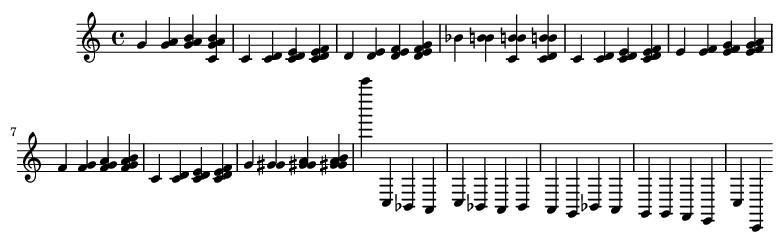

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file '/home/no_lineal/Documents/mir_project/data/nesmdb_midi/tmp.wav'..

 sample audio


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter '/home/no_lineal/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: warning: Instrument not found on channel 9 [bank=128 prog=121], substituted [bank=128 prog=0]


In [7]:
"""

    sample viz

"""

def show(music):
    
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet):
    
    Melody = []
    offset = 0 #Incremental
    
    for i in Snippet:
        
        #If it is chord
        if ("." in i or i.isdigit()):
            
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            
            for j in chord_notes:
                
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
                
        # pattern is a note
        else: 
            
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
            
        # increase offset each iteration so that notes do not stack
        offset += 1
        
    Melody_midi = stream.Stream(Melody)  
    
    return Melody_midi

idx = np.random.choice( range( len(train_midi) ) )

print( f'sample: { ss[ idx ] }' )
print( f'notes: {train_notes[ idx ]}' )

Melody_Snippet = chords_n_notes(train_notes[ idx ])
show(Melody_Snippet)


FluidSynth().midi_to_audio( train_path + ss[ idx ] , data_path + 'tmp.wav')

print('\n sample audio')
Audio( data_path + 'tmp.wav' )

<music21.graph.plot.HorizontalBarPitchSpaceOffset for <music21.stream.Score 0x7f9dc63a8670>>

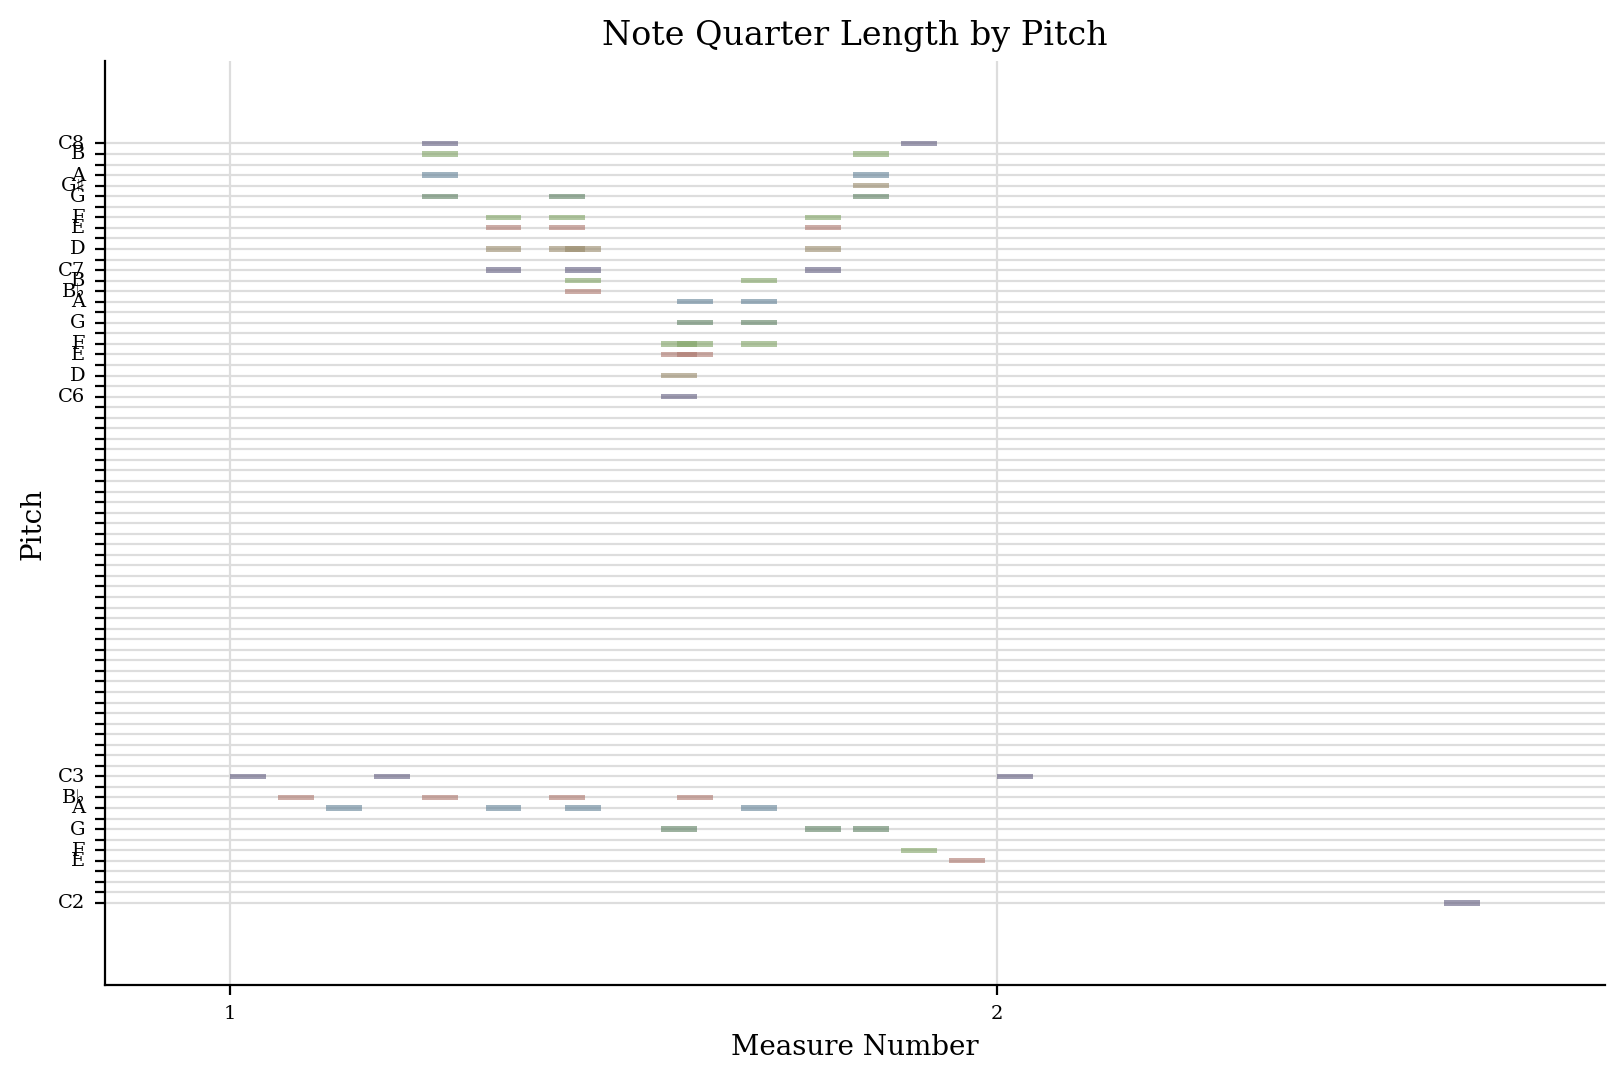

In [8]:
train_midi[ idx ].plot()

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x7f9dc63a8670>>

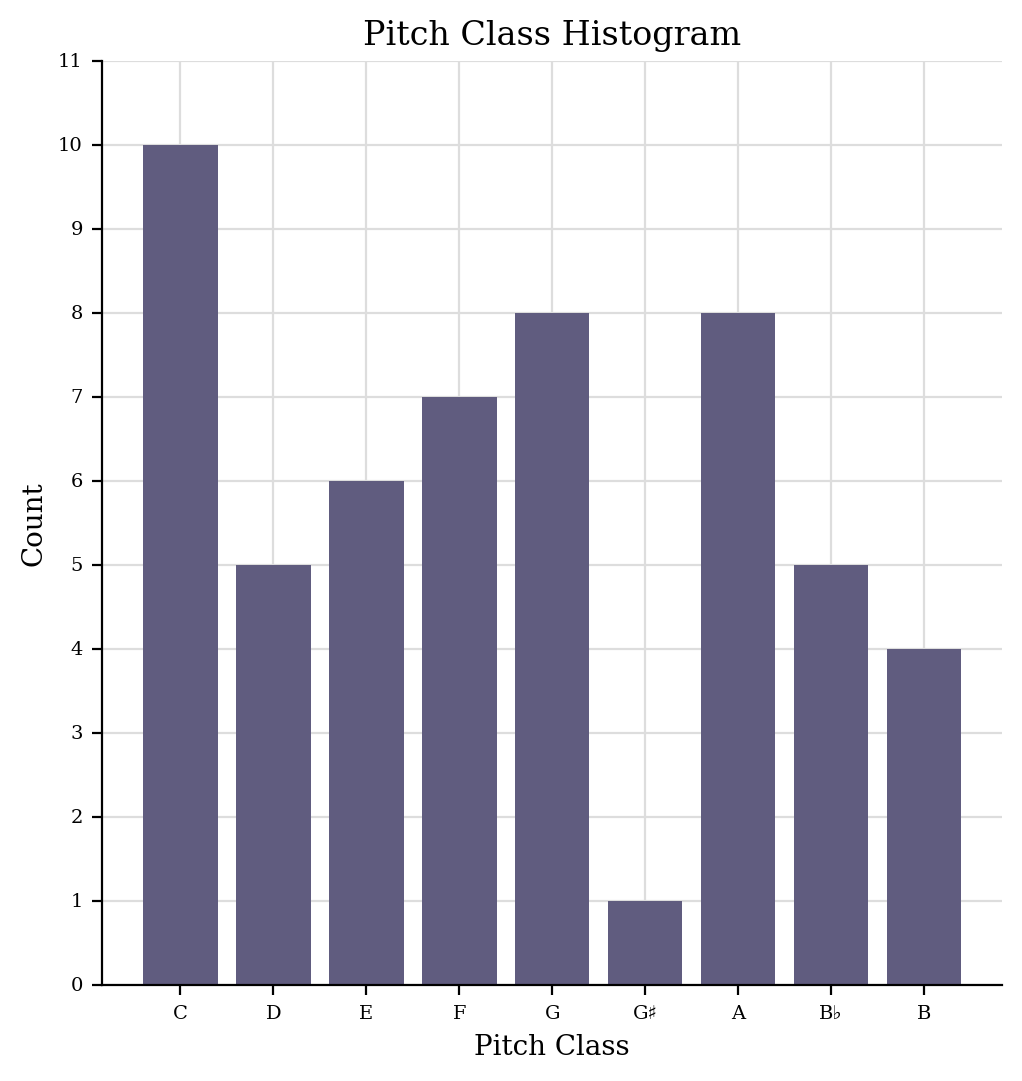

In [9]:
train_midi[ idx ].plot('histogram', 'pitchClass')